L'objectif du TP (2 permières heures) est d'implémenter les mesures vues en cours: moyenne, médiane, quartiles, corrélations. Le dataset concerné est un jeu de donnée qui contient le prix des 3 qualités de médicaments dans différents états d'amériques. La référence du dataset est disponible ici : https://github.com/amitkaps/weed/blob/master/1-Acquire.ipynb

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

Les données sont composées de trois ficihers:
* Le prix par date et par état (pour trois qualités différentes)
* Des informations démographiques sur chaque état
* La population de chaque état


In [5]:
prices_pd = pd.read_csv("data/Weed_Price.csv", parse_dates=[-1])
demography_pd = pd.read_csv("data/Demographics_State.csv")
population_pd = pd.read_csv("data/Population_State.csv")

## Exercice: 
* Commencez par visualiser la structure des données chargées (méthode ''head()'' et ''tail()'')

In [6]:
prices_pd.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [7]:
demography_pd.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [8]:
population_pd.head()

,region,value
0,alabama,4777326
1,alaska,711139
2,arizona,6410979
3,arkansas,2916372
4,california,37325068


In [9]:
prices_pd.tail()



,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31
22897,Wisconsin,350.52,2244,272.71,2221,NaN,167,2014-12-31
22898,Wyoming,322.27,131,351.86,197,NaN,12,2014-12-31


In [10]:
demography_pd.tail()


,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
46,virginia,8100653,64,19,6,8,33493,910,37.5
47,washington,6819579,72,3,7,11,30742,853,37.3
48,west virginia,1853619,93,3,1,1,22966,448,41.5
49,wisconsin,5706871,83,6,2,6,27523,636,38.7
50,wyoming,570134,85,1,1,9,28902,647,36.8


In [11]:
population_pd.tail()

,region,value
46,virginia,8014955
47,washington,6738714
48,west virginia,1850481
49,wisconsin,5687219
50,wyoming,562803


Les types des données peuvent être récupérer à travers la méthode ''dtypes''

In [12]:
prices_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

Nous allons maintenant écrire les fonctions permettant de calculer des mesures ''basiques'' sur des données unidimensionnelles. Pour cela, nous allons travailler avec la structure ''array'' de numpy. Pour convertir une colonne ''pandas'' en ''array'', voici commment faire:

In [13]:
prices_pd["MedQ"].values

array([ 198.64,  260.6 ,  209.35, ...,  224.03,  272.71,  351.86])

## La moyenne

### Exercice: 
Ecrire la fonction moyenne(valeurs) qui calcule la moyenne des éléments d'un tableau (en utilisant la boucle ''for'', sans utiliser les fonctions déjà implémentées dans numpy)

In [14]:
def moyenne(valeurs) :
    tmp=0.
    for i in range (len(valeurs)) :
        tmp = tmp + valeurs[i]
    tmp = tmp / len(valeurs)
    return tmp

Tester la fonction moyenne et comparer vos résultats avec l'implémentation de base de python

In [123]:
print("La moyenne (qualité moyenne) est : %f dollars" % prices_pd["MedQ"].mean())

La moyenne (qualité moyenne) est : 247.618306 dollars


In [124]:
print("La moyenne (qualité moyenne) est : %f dollars" % moyenne(prices_pd["MedQ"].values))


La moyenne (qualité moyenne) est : 247.618306 dollars


### Exercice:
Calculez:
* La moyenne des prix pour les qualités medium et high
* La moyenne des prix pour les qualités medium et high dans l'état de ''New York''

Les calculs seront fait d'une part à l'aide de votre fonction, et d'autre part à l'aide des fonctions de python. 

In [251]:
print("La moyenne (qualité medium) est : %f dollars" % moyenne(prices_pd["MedQ"].values))
print("La moyenne (qualité high) est : %f dollars" % moyenne(prices_pd["HighQ"].values))

print("La moyenne (qualité medium)  à New York est : %f dollars" % moyenne(prices_pd.MedQ[prices_pd["State"] == "New York"].values))
print("La moyenne (qualité high) à New York est : %f dollars" % moyenne(prices_pd.HighQ[prices_pd["State"] == "New York"].values))

La moyenne (qualité medium) est : 247.618306 dollars
La moyenne (qualité high) est : 329.759854 dollars
La moyenne (qualité medium)  à New York est : 265.376949 dollars
La moyenne (qualité high) à New York est : 346.912762 dollars


### Exercice
Calculez la moyenne des prix qualités medium et high dans tous les états -- la liste des états est obtenues ainsi states=np.unique(prices_pd["State"].values)

Pour cela, vous pouvez (devez) le faire de deux manières:
* Faites une boucle sur chacun des états
* Utilisez la fonction groupby comme expliqué ici : http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [252]:
states=np.unique(prices_pd["State"].values)
print("La moyenne des prix qualités medium et high dans tous les états méthode avec une boucle FOR : \n")
for i in range(len(states)) :
    print("%d - Etat de %s "%(i+1,states[i]))
    print("La moyenne (qualité medium)  à %s est : %f dollars" %(states[i],moyenne(prices_pd.MedQ[prices_pd["State"] == states[i]].values)))
    print("La moyenne (qualité high) à %s est : %f dollars \n" %(states[i],moyenne(prices_pd.HighQ[prices_pd["State"] == states[i]].values)))

La moyenne des prix qualités medium et high dans tous les états méthode avec une boucle FOR : 

1 - Etat de Alabama 
La moyenne (qualité medium)  à Alabama est : 204.606169 dollars
La moyenne (qualité high) à Alabama est : 339.561849 dollars 

2 - Etat de Alaska 
La moyenne (qualité medium)  à Alaska est : 262.046392 dollars
La moyenne (qualité high) à Alaska est : 291.482004 dollars 

3 - Etat de Arizona 
La moyenne (qualité medium)  à Arizona est : 209.365345 dollars
La moyenne (qualité high) à Arizona est : 300.667483 dollars 

4 - Etat de Arkansas 
La moyenne (qualité medium)  à Arkansas est : 190.414655 dollars
La moyenne (qualité high) à Arkansas est : 348.056147 dollars 

5 - Etat de California 
La moyenne (qualité medium)  à California est : 191.268909 dollars
La moyenne (qualité high) à California est : 245.376125 dollars 

6 - Etat de Colorado 
La moyenne (qualité medium)  à Colorado est : 196.532517 dollars
La moyenne (qualité high) à Colorado est : 238.918708 dollars 

7 - 

In [253]:
d =prices_pd.groupby(["State"]).mean()
print("La moyenne des prix qualités medium et high dans tous les états avec GROUPBY : \n")
print("Moyenne des HighQ : \n")
print(d["HighQ"])
print("\nMoyenne des MedQ : \n")
print(d["MedQ"])

La moyenne des prix qualités medium et high dans tous les états avec GROUPBY : 

Moyenne des HighQ : 

State
Alabama                 339.561849
Alaska                  291.482004
Arizona                 300.667483
Arkansas                348.056147
California              245.376125
Colorado                238.918708
Connecticut             341.694076
Delaware                366.781849
District of Columbia    348.177416
Florida                 302.570312
Georgia                 326.659644
Hawaii                  309.918931
Idaho                   275.639376
Illinois                355.463341
Indiana                 333.191114
Iowa                    367.095791
Kansas                  350.819198
Kentucky                338.855167
Louisiana               366.832539
Maine                   315.390089
Maryland                370.985167
Massachusetts           349.011648
Michigan                292.090512
Minnesota               358.243274
Mississippi             337.559287
Missouri        

### Exercice
Calculez la moyenne (avec les deux fonctions) sur le prix de la basse qualité. Que constatez vous ? Expliquez...

In [254]:
print("La moyenne (qualité LOW) est : %f dollars" % moyenne(prices_pd["LowQ"].values))
print("La moyenne (qualité LOW) est : %f dollars" % prices_pd["LowQ"].mean())

La moyenne (qualité LOW) est : nan dollars
La moyenne (qualité LOW) est : 203.747847 dollars


### Exercice: 
Remplacez le NAN de la colonne LowQ à l'aide de la fonction décrite ici: http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html. Nous souhaitons plus particulièrement utiliser la méthode ''fill'' après avoir trié par état et par date : prices_pd.sort(columns=['State', 'date'], inplace=True). Expliquez ce que cela fait exactement

In [15]:

prices_pd.sort(columns=['State', 'date'], inplace=True)
prices_pd = prices_pd.fillna(method='ffill')
prices_pd


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20094,Alabama,339.65,1033,198.04,926,147.15,122,2013-12-27
20859,Alabama,339.65,1033,198.04,926,147.15,122,2013-12-28
21573,Alabama,339.75,1036,198.26,929,149.49,123,2013-12-29
22287,Alabama,339.75,1036,198.81,930,149.49,123,2013-12-30
22797,Alabama,339.42,1040,198.68,932,149.49,123,2013-12-31
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
765,Alabama,339.20,1043,198.64,933,149.49,123,2014-01-02
1479,Alabama,339.20,1043,198.64,933,148.48,124,2014-01-03
2244,Alabama,339.20,1043,198.43,934,148.48,124,2014-01-04
3009,Alabama,339.32,1046,198.13,936,148.48,124,2014-01-05


### Exercice: 
Recalculez la moyenne des prix pour la qualité 'Low'. Qu'en est-il maintenant ? 

In [256]:
print("La moyenne (qualité LOW) est : %f dollars" % moyenne(prices_pd["LowQ"].values))
print("La moyenne (qualité LOW) est : %f dollars" % prices_pd["LowQ"].mean())

La moyenne (qualité LOW) est : 203.624092 dollars
La moyenne (qualité LOW) est : 203.624092 dollars


### Exercice :
Dessinez l'histogramme des moyennes des prix (LowQ) par etat. Pour cela, inspirez vous de http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

In [16]:

plt.figure()
moyLowQ = d["LowQ"]
y_pos = np.arange(len(states))
performance =np.random.rand(len(people))

plt.barh(y_pos,moyLowQ, align='center', alpha=0.7)
plt.yticks(y_pos, states)
plt.xlabel('moyLowQ')
plt.ylabel('Etats')
plt.title('L\'histogramme des moyennes des prix (LowQ) par etat')

plt.show()


NameError: name 'd' is not defined

## Estimation de densité

Nous allons maintenant nous intéresser à calculer le nombre d'états concernés par une fourchette de prix. Pour cela:
* Calculer le tableau des prix moyens de la facon suivante
    


In [17]:
prix_moyens=prices_pd[["State","LowQ"]].groupby(["State"]).mean()
#print(prix_moyens)
#print("===========")
prix_moyens=prix_moyens.values.ravel()
print(prix_moyens)

[ 145.9785078   394.65396437  188.50013363  126.77126949  189.78358575
  226.78111359  251.62572383  204.96024499  210.22536748  152.28545657
  148.03545657  170.38378619  150.82788419  189.70080178  157.27581292
  248.9203118   120.90496659  123.76643653  145.53360802  257.85957684
  188.72129176  221.39314031  257.80151448  183.26267261  143.48868597
  146.85919822  619.202049    135.80935412  238.33389755  629.33434298
  226.79452116   87.34024499  204.57639198  151.09155902  335.14004454
  165.22973274  121.1414922   173.5142539   193.05928731  204.932049
  184.85135857  124.14374165  187.53910913  143.62895323  200.07075724
  190.13518931  224.29939866  140.11601336  150.94579065  245.99864143
  161.3       ]


### Exercice : 
* Calculez les valeurs min et max des prix moyens

In [18]:
pmin = prix_moyens.min()
pmax = prix_moyens.max()
print(" Min = %f , Max = %f "%(pmin,pmax ))

 Min = 87.340245 , Max = 629.334343 


### Exercice : 
Prenez un intervalle de discrétisation de taille 20, et calculez l'effectif (sous forme d'un vecteur) du nombre d'états par ''bins''. Dessinez l'histogramme correspondant

<Container object of 20 artists>

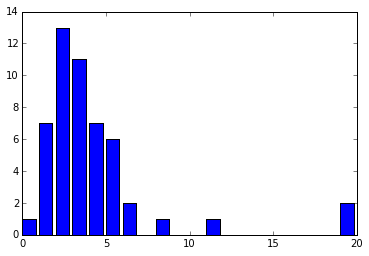

In [261]:
nb_bins = 20
taille = int((pmax - pmin)/nb_bins)+ 1
effectifs = np.zeros(nb_bins)
for i in range(len(prix_moyens)) : 
    pm = prix_moyens[i]
    idx = int((pm-pmin+1)/taille)
    effectifs[idx] = effectifs[idx] + 1
plt.bar(np.arange(len(effectifs)),effectifs)


### Exercice :
Prenez maintenant un intervalle de taille 40

<Container object of 40 artists>

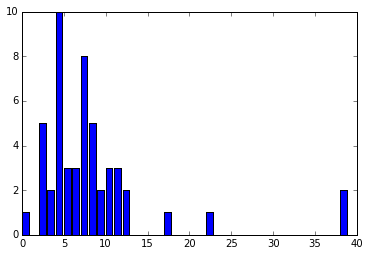

In [262]:
nb_bins = 40
taille = int((pmax - pmin)/nb_bins)+ 1
effectifs = np.zeros(nb_bins)
for i in range(len(prix_moyens)) : 
    pm = prix_moyens[i]
    idx = int((pm-pmin+1)/taille)
    effectifs[idx] = effectifs[idx] + 1

plt.bar(np.arange(len(effectifs)),effectifs)


On peut faire cela de la manière suivante avec pandas

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: Accessing 'levels' is deprecated, use 'categories'
  app.launch_new_instance()


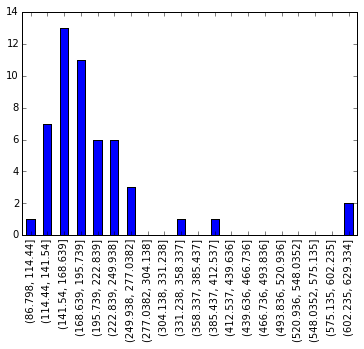

In [263]:
effectif=pd.cut(prix_moyens,20)
effectif2=pd.value_counts(effectif)
effectif3=effectif2.reindex(effectif.levels)
effectif3.plot(kind='bar')

Et comme cela avec numpy

(array([  1.,   7.,  13.,  11.,   6.,   6.,   3.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  87.34024499,  114.43994989,  141.53965479,  168.63935969,
         195.73906459,  222.83876949,  249.93847439,  277.03817929,
         304.13788419,  331.23758909,  358.33729399,  385.43699889,
         412.53670379,  439.63640869,  466.73611359,  493.83581849,
         520.93552339,  548.03522829,  575.13493318,  602.23463808,
         629.33434298]),
 <a list of 20 Patch objects>)

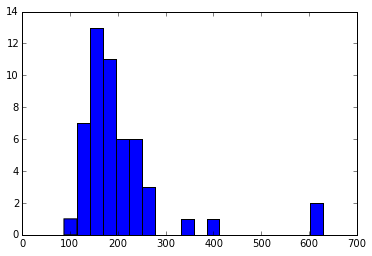

In [240]:
plt.hist(prix_moyens,bins=20)

### Exercice : 
Soit une taille de fenetre de 'n', faite l'estimation de densité avec un noyau fenetre classique en prenant toutes les fenetres glissantes de taille 'n', et en se déplacant entre la valeur min et la valeur max d'un pas 'epsilon'

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


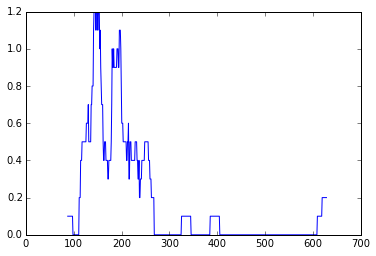

In [264]:
pmin=prix_moyens.min()
pmax=prix_moyens.max()
taille=20
pos=0
step=1
s=np.floor((pmax-pmin)/step)+1

x=np.zeros(s)
y=np.zeros(s)
p=pmin
while(p<=pmax):
    #On compte l'effectif entre p-taille/2 et p+taille/2
    count=0
    for v in prix_moyens:
        if ((v>=p-taille/2) and (v<p+taille/2)):
            y[pos]=y[pos] + 1
    y[pos]=y[pos]/(taille/2)
    x[pos]=p
    pos=pos+1
    p=p+step    
    
plt.plot(x,y)

Avec un noyau triangulaire on obtien le code suivant.
* Expliquez ce qu'il se passe
P.S: Il manque une normalisation pour avoir une vraie distribution


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


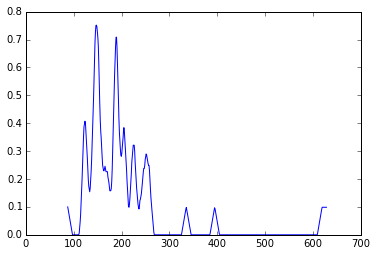

In [265]:
pmin=prix_moyens.min()
pmax=prix_moyens.max()
taille=20
pos=0
step=1
s=np.floor((pmax-pmin)/step)+1

x=np.zeros(s)
y=np.zeros(s)
p=pmin
while(p<=pmax):
    #On compte l'effectif entre p-taille/2 et p+taille/2
    count=0
    for v in prix_moyens:
        if ((v>=p-taille/2) and (v<p+taille/2)):
            dist=1-np.abs(p-v)/(taille/2)
            y[pos]=y[pos]+dist
    y[pos]=y[pos]/(taille/2)
    x[pos]=p
    pos=pos+1
    p=p+step    
    
plt.plot(x,y)

L'estimation de densité en pandas peut se faire ainsi

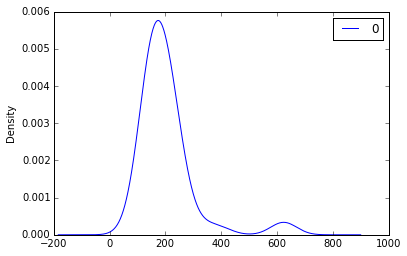

In [266]:
effectif=pd.DataFrame(prix_moyens)
effectif.plot(kind='kde')

## Densité cumulée

### Exercice: 
Calculez la densité cumulée à partir de prix_moyens, avec un intervalle de discrétisation donné et dessinez. La méthode doit retourner deux tableau: l'abscisse X (les prix moyens possibles entre prix min et prix max), et la densité associée

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


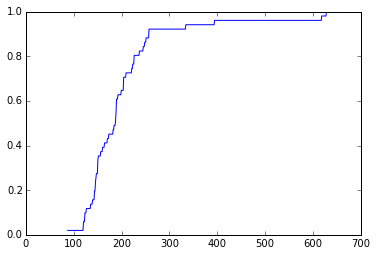

In [267]:
step = 1
s = np.floor((pmax-pmin)/step)+1
x = np.zeros(s)
densite = np.zeros(s)
p = pmin
pos = 0
cumul = 0
while(p <= pmax) :
    for v in prix_moyens : 
        if(p +step > v >= p) :
            cumul = cumul + 1
    densite[pos] = cumul
    x[pos] = p
    pos = pos +1
    p = p + step

    #normalisation
for i in range(len(densite)) :
    densite[i] = densite[i] / cumul
    
plt.plot(x,densite)

### Exercice : 
Ecrire la fonction Q(alpha,x,y) qui permet de trouver le quartile(alpha,x,y) - quartile(0.5,x,densite) correspondra à la médiane. CAlculer et dessinez (sur une feuille) le boxplot

In [19]:
def Q(alpha,x,y) :
    x.sort()
    m=len(x)
    if(alpha==0.5):
        if m % 2==0 :
            return (x[m /2]+x[m/2-1])/2
        else :
            return x[m/2]
    else :
        return x[np.ceil(alpha*m)-1]
Q(0.75,prix_moyens,0)            

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


224.29939866369585

Le boxplot en pandas se fait ainsi:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x7ff4f92e6590>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff4f923b550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4f9245850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4f9245210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff4f92e6810>,
  <matplotlib.lines.Line2D at 0x7ff4f92e6ed0>]}

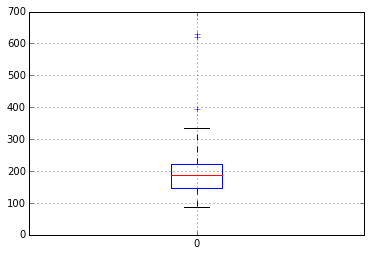

In [20]:
a=pd.DataFrame(prix_moyens)
a.boxplot()

## Variance

### Exercice : 
On souhaite maintenant rajouter une colonne ''HighQ_var'' aux données originales contenant la variance des prix par état. ATTENTION, cela suppose de traiter les états (State) les uns après les autres

In [21]:
qq = prices_pd[["State","HighQ"]].groupby(["State"]).std()

frams = [prices_pd,qq]
pd.concat(frams)

,HighQ,HighQN,LowQ,LowQN,MedQ,MedQN,State,date
20094,339.650000,1033,147.15,122,198.04,926,Alabama,2013-12-27
20859,339.650000,1033,147.15,122,198.04,926,Alabama,2013-12-28
21573,339.750000,1036,149.49,123,198.26,929,Alabama,2013-12-29
22287,339.750000,1036,149.49,123,198.81,930,Alabama,2013-12-30
22797,339.420000,1040,149.49,123,198.68,932,Alabama,2013-12-31
0,339.060000,1042,149.49,123,198.64,933,Alabama,2014-01-01
765,339.200000,1043,149.49,123,198.64,933,Alabama,2014-01-02
1479,339.200000,1043,148.48,124,198.64,933,Alabama,2014-01-03
2244,339.200000,1043,148.48,124,198.43,934,Alabama,2014-01-04
3009,339.320000,1046,148.48,124,198.13,936,Alabama,2014-01-05


## Synthèse : La californie

### Exercice : 
Pandas permet de faire la synthèse de données de la manière suivante: 
data.describe()
* Vérifier que les valeurs trouvée sur l'état de la californie collent avec les valeurs trouvées par vos différentes méthodes. 
** Pour cela: mettez le code qui utilise vos fonctions (moyennes, variance, et quartiles) ainsi que le résutlats de la fonction describe

In [278]:
prices_pd.describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
count,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000
mean,329.759854,2274.743657,247.618306,2183.737805,203.624092,202.804489
std,41.173167,2641.936586,44.276015,2789.902626,101.484265,220.531987
min,202.020000,93.000000,144.850000,134.000000,63.700000,11.000000
25%,303.780000,597.000000,215.775000,548.000000,145.810000,51.000000
50%,342.310000,1420.000000,245.800000,1320.000000,185.780000,139.000000
75%,356.550000,2958.000000,274.155000,2673.000000,222.940000,263.000000
max,415.700000,18492.000000,379.000000,22027.000000,734.650000,1287.000000


## Matrice de corrélation

### Exercice: 

Nous allons maintenant nous intéresser à calculer la corrélation entre les prix à new-york et les prix en californie
* Commencez par dessinez le nuage des points des prix(par date) en californie (axe x) et à new york (axe y) pour la bonne qualité. Pour cela on va d'abord créer un DataFrame avec le prix de californie et de new york par date

In [35]:
prix_ny=prices_pd[prices_pd['State']=='New York']
prix_ca=prices_pd[prices_pd['State']=='California']
prix_ca_ny=prix_ca.merge(prix_ny,on='date')
prix_ca_ny.head()


,State_x,HighQ_x,HighQN_x,MedQ_x,MedQN_x,LowQ_x,LowQN_x,date,State_y,HighQ_y,HighQN_y,MedQ_y,MedQN_y,LowQ_y,LowQN_y
0,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,New York,351.98,5773,268.83,5786,190.31,479
1,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,New York,351.92,5775,268.83,5786,190.31,479
2,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,New York,351.99,5785,269.02,5806,190.75,480
3,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,New York,352.02,5791,268.98,5814,190.75,480
4,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,New York,351.97,5794,268.93,5818,190.75,480


### Exercice

Dessinez le nuage de points : voir http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

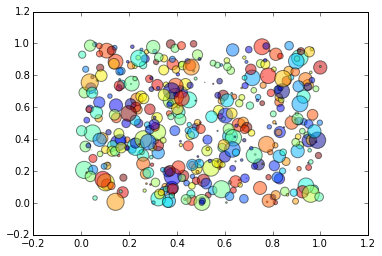

In [48]:
N2 = len(prix_ny)
N1=len(prix_ca)
x = np.random.rand(N1)
y = np.random.rand(N2)
colors = np.random.rand(N1)
area = np.pi * (10 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Exercice

A l'aide de la fonction moyenne écrite précédemment, écrire une fonction correlation(x,y) qui calcule la correlation lineaire entre deux tableaux numpy

In [50]:
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = moyenne(a)
    b_mean = moyenne(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [64]:
import math
def correlation (x,y) : 
    return cov(x,y)/math.sqrt(x.std()*math.sqrt(y.std()))

In [66]:
print("La correlation est :%f"%correlation(prix_ca_ny["HighQ_x"].values,prix_ca_ny["HighQ_y"].values))

La correlation est :3.294608


### Exercice: 

Calculez la matrice des correlations pour toutes les combinaisons d'états

In [65]:
 for x in prices_pd["HighQ"] :
         for y in prices_pd["HighQ"] :
                correlation (x,y)
        

TypeError: object of type 'numpy.float64' has no len()

## Exercice: 
* Calculez les correlations entre le prix (low et high) en fonction du revenu moyen par etat disponible dans le tableau demography_pd chargé au début
* que pouvez vous en conclure

## Travail pour la fin de TP + Maison
Travail de rendu (à faire avant le prochain TP):
* Vous avez implémenté et vu comment calculer tout un ensemble d'indicateurs statistiques assez simples. 
* Vous avez vu comment produire de jolis graphiques

## Travail à faire : proposez une analyse originale a l'aide des données disponibles ici : http://opendata.paris.fr et des indicateurs/graphiques vus en cours et aujourd'hui
* Voir  http://matplotlib.org/gallery.html pour les visualisations

#### Exemple : 
* (Récupération de données: ) Téléchargez les données ici : http://opendata.paris.fr/explore/dataset/liste_des_prenoms_2004_a_2012/?disjunctive.prenoms&disjunctive.annee
* Calculez l'histogramme et la densité des différents prénoms 
* Proposez une visualisation des 10 prénoms les plus donnés chaque année
* Calculer les corrélations entre prénoms pour dégager les listes de prénoms corrélés et anti-corrélés dans le temps. Illuster les plus fortes corrélations par des nuages de points
* ==> Proposez un nuage de mots à partir des données extraites (outil possible: https://www.jasondavies.com/wordcloud/ ou  https://github.com/mbostock/d3/wiki/Gallery)



    